In [2]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [51]:
def plot(X,Y, colors, title, xlabel, ylabel, colorbar_label):
    plt.scatter(X, Y, c=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar(label=colorbar_label, fraction=0.046, pad=0.04, ticks=np.arange(0, 11, 1))


def fit_line(X,Y):
    coefficients = np.polyfit(X,Y, 1)
    fit = np.poly1d(coefficients)
    x_values = np.linspace(X.min(), X.max(), 100)
    y_values = fit(x_values)
    plt.plot(x_values, y_values, 'r')

In [3]:
n_points_sample = 600
data = pd.read_csv('../data.zip', index_col=0, parse_dates=True)
results = pd.read_csv('../final_dfs.csv')
results


,Parameter-based Transfer MSE,Instance-based Transfer MSE,IEEE 738 MSE,Source Only MSE,Target Only MSE,Source + Target (No Transfer) MSE,Source,Target,available_days
0,1.00,2.36,1.74,0.81,1.88,0.93,4,10,5
1,1.25,11.66,0.86,0.72,1.96,1.32,4,8,5
2,0.69,0.96,0.74,0.99,1.97,1.11,1,5,5
3,2.33,2.52,3.18,2.15,4.29,2.15,1,9,5
4,0.97,1.84,0.59,0.79,1.16,0.78,1,4,5
...,...,...,...,...,...,...,...,...,...
545,0.65,9.68,1.74,0.56,1.50,0.78,6,10,25
546,0.72,4.21,0.86,1.12,1.34,0.90,3,8,25
547,0.86,6.23,0.71,0.75,1.29,0.89,2,6,25
548,2.22,6.84,0.71,0.67,1.42,1.01,5,6,25


In [4]:
results = results[results['available_days'] == 25] 

In [5]:
#group by available_days 
bests = []
for index, group in results.groupby('available_days'):
    idx = group['Parameter-based Transfer MSE'].idxmin()
    source = results.loc[idx, "Source"]
    target = results.loc[idx, "Target"]
    bests.append((source, target))

In [6]:
worsts = []
#group by available_days 
for index, group in results.groupby('available_days'):
    idx = group['Parameter-based Transfer MSE'].idxmax()
    source = results.loc[idx, "Source"]
    target = results.loc[idx, "Target"]
    worsts.append((source, target))

In [7]:
# We focus on 25 days 
best_source = bests[-1][0]
best_target = bests[-1][1]
worst_source = worsts[-1][0]
worst_target = worsts[-1][1]

data_best_source = data[data['id'] == best_source]
data_best_target = data[data['id'] == best_target]
data_worst_source = data[data['id'] == worst_source]
data_worst_target = data[data['id'] == worst_target]

In [8]:
worst_results = results[results['Source'] == worst_source]
worst_results = worst_results[worst_results['Target'] == worst_target]
worst_results

,Parameter-based Transfer MSE,Instance-based Transfer MSE,IEEE 738 MSE,Source Only MSE,Target Only MSE,Source + Target (No Transfer) MSE,Source,Target,available_days
548,2.22,6.84,0.71,0.67,1.42,1.01,5,6,25


In [9]:
inputs = data.columns[:-4]
output = data.columns[-3]

In [10]:
data_best_source_inputs = data_best_source[inputs]
data_best_target_inputs = data_best_target[inputs]
data_worst_source_inputs = data_worst_source[inputs]
data_worst_target_inputs = data_worst_target[inputs]

#normalize
data_best_source_inputs = (data_best_source_inputs - data_best_source_inputs.mean()) / data_best_source_inputs.std()
data_best_target_inputs = (data_best_target_inputs - data_best_target_inputs.mean()) / data_best_target_inputs.std()
data_worst_source_inputs = (data_worst_source_inputs - data_worst_source_inputs.mean()) / data_worst_source_inputs.std()
data_worst_target_inputs = (data_worst_target_inputs - data_worst_target_inputs.mean()) / data_worst_target_inputs.std()

In [11]:
#compute PCA 
pca = PCA(n_components=2)
pca.fit(data_best_source_inputs)
data_best_source_pca = pca.transform(data_best_source_inputs)
data_best_target_pca =  pca.transform(data_best_target_inputs)

#sample numpy array 
sampled_idx = np.random.choice(data_best_source_pca.shape[0], n_points_sample)
data_best_source_pca_sampled = data_best_source_pca[sampled_idx, :]
data_best_target_pca_sampled = data_best_target_pca[sampled_idx, :]


In [12]:
#compute PCA
pca = PCA(n_components=2)
pca.fit(data_worst_source_inputs)
data_worst_source_pca = pca.transform(data_worst_source_inputs)
data_worst_target_pca =  pca.transform(data_worst_target_inputs)

#sample numpy array 
sampled_idx = np.random.choice(data_worst_source_pca.shape[0], n_points_sample)
data_worst_source_pca_sampled = data_worst_source_pca[sampled_idx, :]
data_worst_target_pca_sampled = data_worst_target_pca[sampled_idx, :]


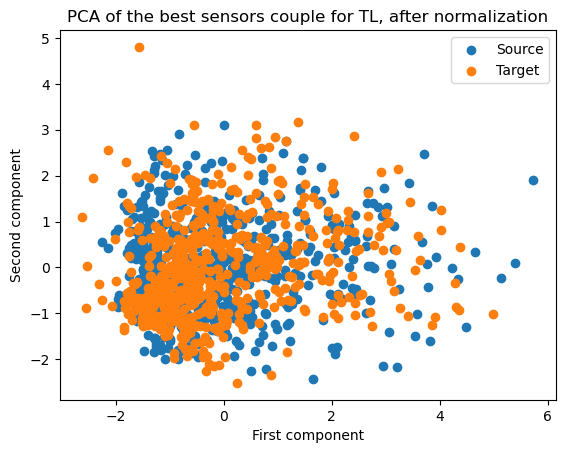

In [13]:

plt.scatter(data_best_source_pca_sampled[:,0], data_best_source_pca_sampled[:,1], label='Source')
plt.scatter(data_best_target_pca_sampled[:,0], data_best_target_pca_sampled[:,1], label='Target')

#add title and axis names
plt.title('PCA of the best sensors couple for TL, after normalization')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend()

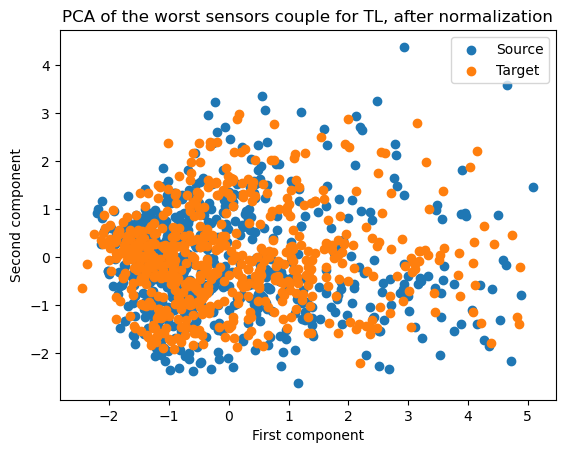

In [14]:
plt.scatter(data_worst_source_pca_sampled[:,0], data_worst_source_pca_sampled[:,1], label='Source')
plt.scatter(data_worst_target_pca_sampled[:,0], data_worst_target_pca_sampled[:,1], label='Target')


#add title and axis names
plt.title('PCA of the worst sensors couple for TL, after normalization')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend()

Load distances

In [15]:
maximum_couple = pd.read_csv('./maximum_sensors.csv').iloc[0,:]
minimum_couple = pd.read_csv('./minimum_sensors.csv').iloc[0,:]

In [16]:
data_best_source = data[data['id'] == maximum_couple['First Sensor']]
data_best_target = data[data['id'] == maximum_couple['Second Sensor']]
data_worst_source = data[data['id'] == minimum_couple['First Sensor']]
data_worst_target = data[data['id'] == minimum_couple['Second Sensor']]

In [17]:
data_best_source_inputs = data_best_source[inputs]
data_best_target_inputs = data_best_target[inputs]
data_worst_source_inputs = data_worst_source[inputs]
data_worst_target_inputs = data_worst_target[inputs]

#normalize
data_best_source_inputs = (data_best_source_inputs - data_best_source_inputs.mean()) / data_best_source_inputs.std()
data_best_target_inputs = (data_best_target_inputs - data_best_target_inputs.mean()) / data_best_target_inputs.std()
data_worst_source_inputs = (data_worst_source_inputs - data_worst_source_inputs.mean()) / data_worst_source_inputs.std()
data_worst_target_inputs = (data_worst_target_inputs - data_worst_target_inputs.mean()) / data_worst_target_inputs.std()

In [18]:
#compute PCA 
pca = PCA(n_components=2)
pca.fit(data_best_source_inputs)
data_best_source_pca = pca.transform(data_best_source_inputs)
data_best_target_pca =  pca.transform(data_best_target_inputs)

#sample numpy array 
sampled_idx = np.random.choice(data_best_source_pca.shape[0], n_points_sample)
data_best_source_pca_sampled = data_best_source_pca[sampled_idx, :]
data_best_target_pca_sampled = data_best_target_pca[sampled_idx, :]


In [19]:
#compute PCA
pca = PCA(n_components=2)
pca.fit(data_worst_source_inputs)
data_worst_source_pca = pca.transform(data_worst_source_inputs)
data_worst_target_pca =  pca.transform(data_worst_target_inputs)

#sample numpy array 
sampled_idx = np.random.choice(data_worst_source_pca.shape[0], n_points_sample)
data_worst_source_pca_sampled = data_worst_source_pca[sampled_idx, :]
data_worst_target_pca_sampled = data_worst_target_pca[sampled_idx, :]

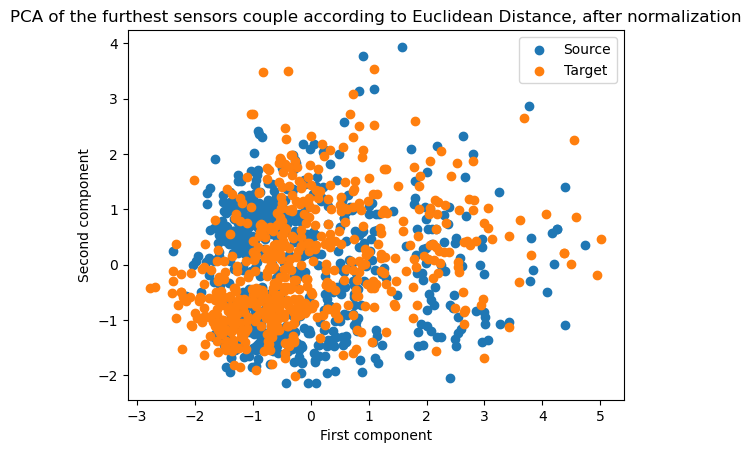

In [20]:

plt.scatter(data_best_source_pca_sampled[:,0], data_best_source_pca_sampled[:,1], label='Source')
plt.scatter(data_best_target_pca_sampled[:,0], data_best_target_pca_sampled[:,1], label='Target')

#add title and axis names
plt.title('PCA of the furthest sensors couple according to Euclidean Distance, after normalization')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend()

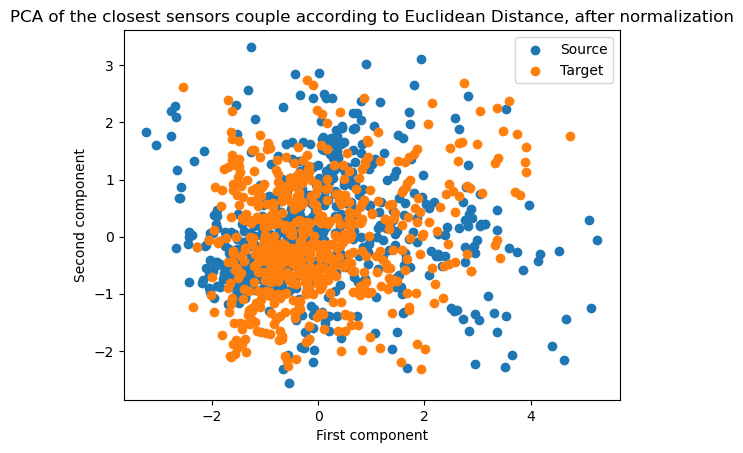

In [21]:
plt.scatter(data_worst_source_pca_sampled[:,0], data_worst_source_pca_sampled[:,1], label='Source')
plt.scatter(data_worst_target_pca_sampled[:,0], data_worst_target_pca_sampled[:,1], label='Target')


#add title and axis names
plt.title('PCA of the closest sensors couple according to Euclidean Distance, after normalization')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend()

MSE vs DISTANCE

In [22]:
results


,Parameter-based Transfer MSE,Instance-based Transfer MSE,IEEE 738 MSE,Source Only MSE,Target Only MSE,Source + Target (No Transfer) MSE,Source,Target,available_days
440,0.72,8.20,1.74,0.61,1.50,1.05,2,10,25
441,0.94,7.41,0.75,0.86,1.42,0.70,4,2,25
442,0.82,6.21,0.54,2.31,1.88,0.91,10,0,25
443,1.15,9.34,1.46,2.31,2.42,1.73,9,3,25
444,0.94,5.03,0.54,1.61,1.88,1.14,3,0,25
...,...,...,...,...,...,...,...,...,...
545,0.65,9.68,1.74,0.56,1.50,0.78,6,10,25
546,0.72,4.21,0.86,1.12,1.34,0.90,3,8,25
547,0.86,6.23,0.71,0.75,1.29,0.89,2,6,25
548,2.22,6.84,0.71,0.67,1.42,1.01,5,6,25


In [23]:
# distances = pd.read_csv('../measures.csv')

# #Merge with results
# distances = distances.merge(results, left_on=['Source', 'Target'], right_on=['Source', 'Target'])
# distances

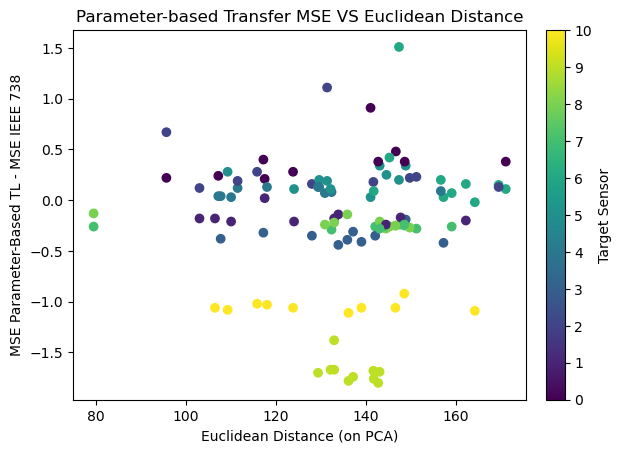

In [48]:
#plot Parameter-based Transfer MSE VS Euclidean Distance
plt.scatter(distances['euclidean_distance_PCA'], distances['Parameter-based Transfer MSE'] - distances['IEEE 738 MSE'], c=distances['Target'])
#plot IEEE 738 MSE VS Euclidean Distance
# plt.scatter(distances['euclidean_distance'], distances['IEEE 738 MSE'])
plt.title('Parameter-based Transfer MSE VS Euclidean Distance')
plt.xlabel('Euclidean Distance (on PCA)')
plt.ylabel('MSE Parameter-Based TL - MSE IEEE 738')
plt.colorbar(label='Target Sensor', fraction=0.046, pad=0.04, ticks=np.arange(0, 11, 1))

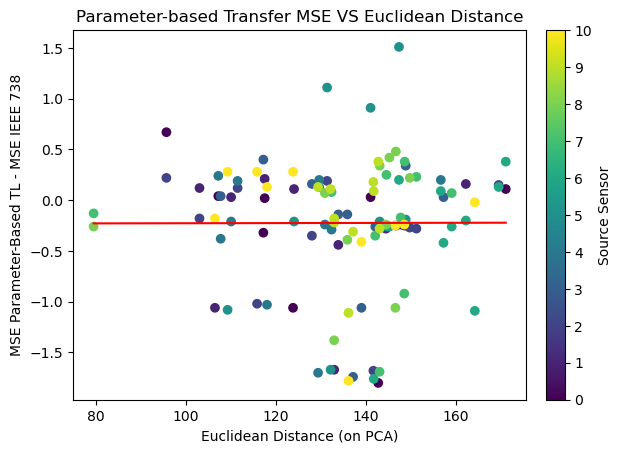

In [50]:
#plot Parameter-based Transfer MSE VS Euclidean Distance
X = distances['euclidean_distance_PCA']

plt.scatter(distances['euclidean_distance_PCA'], distances['Parameter-based Transfer MSE'] - distances['IEEE 738 MSE'], c=distances['Source'])
#plot IEEE 738 MSE VS Euclidean Distance
# plt.scatter(distances['euclidean_distance'], distances['IEEE 738 MSE'])
plt.title('Parameter-based Transfer MSE VS Euclidean Distance')
plt.xlabel('Euclidean Distance (on PCA)')
plt.ylabel('MSE Parameter-Based TL - MSE IEEE 738')
plt.colorbar(label='Source Sensor', fraction=0.046, pad=0.04, ticks=np.arange(0, 11, 1))

coefficients = np.polyfit(distances['euclidean_distance_PCA'], distances['Parameter-based Transfer MSE'] - distances['IEEE 738 MSE'], 1)
fit = np.poly1d(coefficients)
x_values = np.linspace(distances['euclidean_distance_PCA'].min(), distances['euclidean_distance_PCA'].max(), 100)
y_values = fit(x_values)
plt.plot(x_values, y_values, 'r')


In [33]:
distances

,Source,Target,euclidean_distance_PCA,Parameter-based Transfer MSE,Instance-based Transfer MSE,IEEE 738 MSE,Source Only MSE,Target Only MSE,Source + Target (No Transfer) MSE,available_days
0,0,1,117.513185,0.95,2.12,0.93,0.96,1.52,1.58,25
1,0,2,95.715937,1.42,4.06,0.75,1.18,0.98,0.82,25
2,0,3,117.224840,1.14,3.71,1.46,1.56,1.99,1.90,25
3,0,4,107.228094,0.63,2.14,0.59,0.85,0.71,0.79,25
4,0,5,141.001168,0.77,2.99,0.74,0.67,1.59,0.68,25
...,...,...,...,...,...,...,...,...,...,...
105,10,5,109.290380,1.02,0.88,0.74,0.71,1.17,1.32,25
106,10,6,164.124892,0.69,7.12,0.71,0.74,1.42,1.09,25
107,10,7,148.477851,0.69,2.72,0.93,1.30,0.98,0.82,25
108,10,8,146.504945,0.61,3.82,0.86,0.74,1.24,0.83,25


In [32]:
#plot Parameter-based Transfer MSE VS Euclidean Distance
plt.scatter(distances['euclidean_distance'], distances['Parameter-based Transfer MSE'], c=distances['Source'])
#plot IEEE 738 MSE VS Euclidean Distance
# plt.scatter(distances['euclidean_distance'], distances['IEEE 738 MSE'])
plt.title('Parameter-based Transfer MSE VS Euclidean Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('MSE Parameter-Based TL')

KeyError: 'euclidean_distance'

# When the output is used

Correlation, delta, colored per source

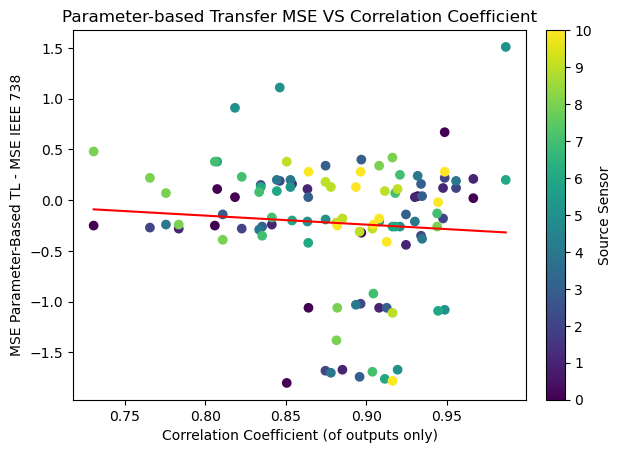

In [66]:
correlations = pd.read_csv('../measures_outputs.csv',index_col=0)

#Merge with results
correlations = correlations.merge(results, left_on=['Source', 'Target'], right_on=['Source', 'Target'])
correlations

X = correlations['correlation_coefficient']
Y = correlations['Parameter-based Transfer MSE'] - correlations['IEEE 738 MSE']
colors = correlations['Source']
title = 'Parameter-based Transfer MSE VS Correlation Coefficient'
xlabel = 'Correlation Coefficient (of outputs only)'
ylabel = 'MSE Parameter-Based TL - MSE IEEE 738'
colorbar_label = 'Source Sensor'

plot(X, Y, colors, title, xlabel, ylabel, colorbar_label)
fit_line(X, Y)

Correlation, delta, colored per Target

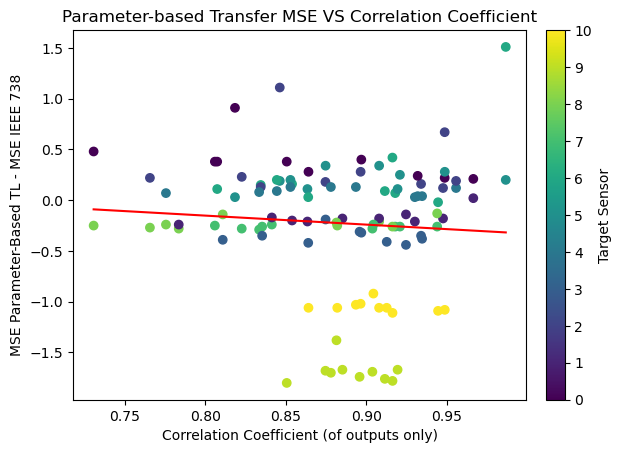

In [67]:
colors = correlations['Target']
colorbar_label = 'Target Sensor'

plot(X, Y, colors, title, xlabel, ylabel, colorbar_label)
fit_line(X, Y)

Correlation, absolute, colored per Source

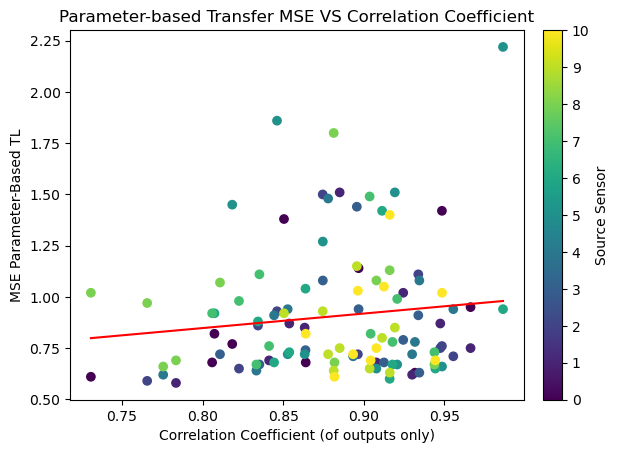

In [68]:
colors = correlations['Source']
colorbar_label = 'Source Sensor'
Y = correlations['Parameter-based Transfer MSE']
ylabel = 'MSE Parameter-Based TL'

plot(X, Y, colors, title, xlabel, ylabel, colorbar_label)
fit_line(X, Y)

Correlation, absolute, colored per Target

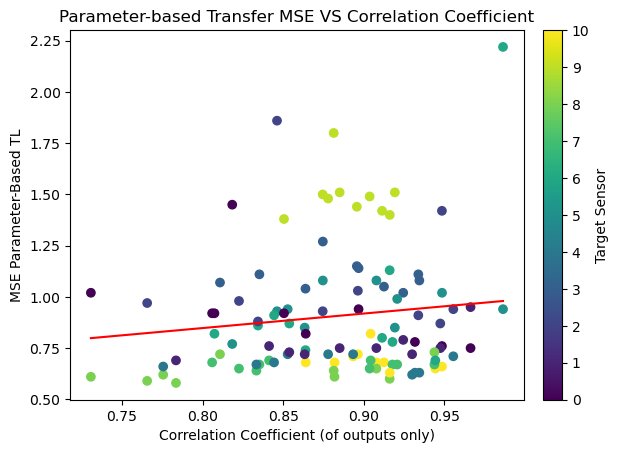

In [69]:
colors = correlations['Target']
colorbar_label = 'Target Sensor'

plot(X, Y, colors, title, xlabel, ylabel, colorbar_label)
fit_line(X, Y)

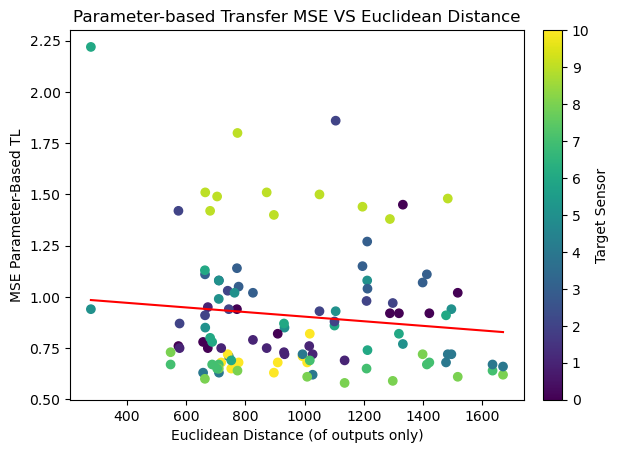

In [70]:
X = correlations['euclidean_distance']
xlabel = 'Euclidean Distance (of outputs only)'
title = 'Parameter-based Transfer MSE VS Euclidean Distance'
plot(X, Y, colors, title, xlabel, ylabel, colorbar_label)
fit_line(X, Y)

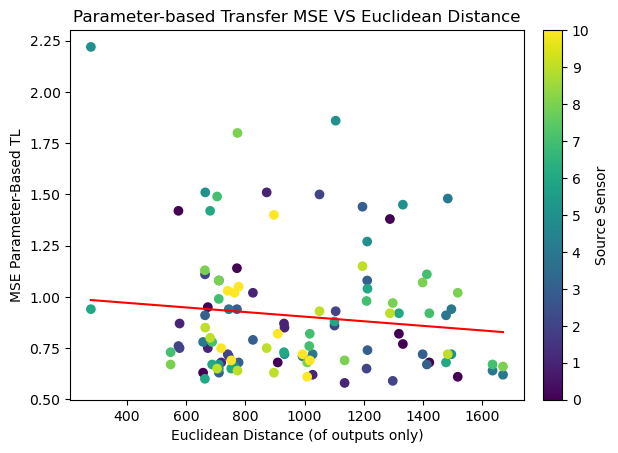

In [71]:
colors = correlations['Source']
colorbar_label = 'Source Sensor'
plot(X, Y, colors, title, xlabel, ylabel, colorbar_label)
fit_line(X, Y)

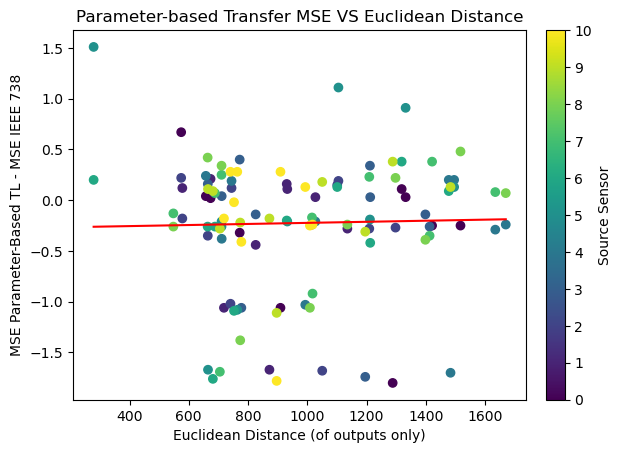

In [72]:
Y = correlations['Parameter-based Transfer MSE'] - correlations['IEEE 738 MSE'] 
ylabel = 'MSE Parameter-Based TL - MSE IEEE 738'
plot(X, Y, colors, title, xlabel, ylabel, colorbar_label)
fit_line(X, Y)

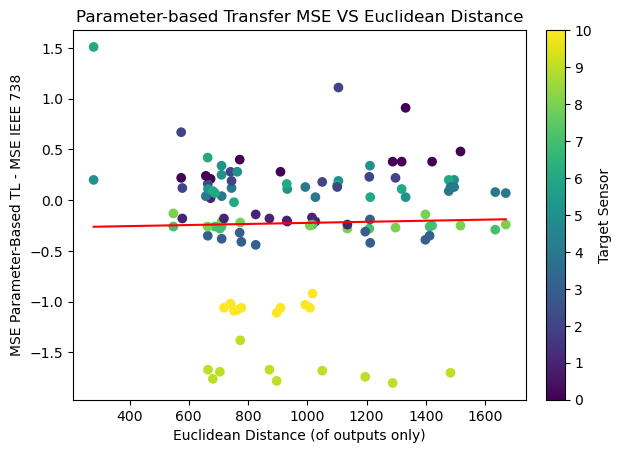

In [73]:
colors = correlations['Target']
colorbar_label = 'Target Sensor'
plot(X, Y, colors, title, xlabel, ylabel, colorbar_label)
fit_line(X, Y)